# Reinforcement Learning Project

---


<H2>Case Study for Using Reinforcement Learning Technique in Sudoku Game and 15-Puzzle Game </H2>
<br>Reinforcement Learning  (TX00DQ05-3001)
<br>Instructor: Peter Hjort (Peter.Hjort@metropolia.fi)
<br>Department of Information Technology
<br>Metropolia University of Appiled Sciences, Helsinki, Finland
<br>
<br>Members:
<br>1900553 Sirichai Khomleart (sirichai.khomleart@gmail.com)
<br>1900554 Puttiwat Wanna (puttiwat.wan@gmail.com)
<br>
<br>Last edited: May 7, 2019

## 0. Table of Contents

---



1. Introduction to the Case Study
2. Importing Nescessary Libraries
3. Sudoku Game
        3.1. General Information about Sudoku Game
        3.2. Brute Force Algorithm
        3.3. Reinforcement Algorithm (Temporal Difference Control: Sarsa)
            3.3.1. State
            3.3.2. Action
            3.3.3. Reward
            3.3.4. Algorithm
            3.3.5. Take a step further
4. 15-Puzzle Game
        4.1. General Information about 15-Puzzle Game
        4.2. Brute Force Algorithm
        4.3. Reinforcement Algorithm (Temporal Difference Control: Sarsa)
            4.3.1. State
            4.3.2. Action
            4.3.3. Reward
            4.3.4. Algorithm
5. Conclusion
6. References

## 1. Introduction to the Case Study


---



This case study is a part of Reinforcement Learning course (TX00DQ05-3001), Metropolia University of Applied Sciences, Finland. The objective of this case study is to try applying reinforcement learning techniques to the puzzle games, like sudoku and 15-puzzle. 
<br>
<br>Normally, puzzle games, such as sudoku and 15-puzzle, can be solve by hands using guess-and-try technique. People try to find the solution by applying a possible choice of actions to the problem to see whether the selected choice is correct or not. If the selected choice is correct, then continue to solve the remaining problems until all the puzzles are solved. If not, then go back to the last state before selecting an action, then try another action hoping that the new action is the right one that leads to the solution. This process will go over and over again as we solve the puzzle. During this process, the knowledge about the puzzle will be gained so that it can be used to solve other similar puzzles in the future.
<br>
<br>To use computer programming to solve these puzzle games, the brute force technique was used to find the right solution from all possible actions in the puzzle. Brute force algorithm will guarantee that the outcome will absolutely be found, if that puzzle is valid or solveable. This brute force technique will do the depth first search, generate all possible actions and solutions to see which one is the correct solution for specific puzzle, then output as an answer to that puzzle. 
<br>
<br>However, as the algorithm will try to find possible outputs form all possible actions, this bruce force technique likely to take very long time to solve a puzzle. So, an idea to use reinforment learning techniques learned in the class was used to apply to these problems, to let an agent learns about the puzzles and find the policy that leads itself to the correct answer. This way, the agent will have some knowledge and idea of which action should be taken in different states of the puzzle. When the new puzzle comes, the agent can use those knowledge gained from the past puzzles to take an action without learning again about that new puzzle from the start like the brute force algorithm.
<br>
<br>As stated earlier, this case study will use sudoku game and 15-puzzle game as the puzzles to experiment with, since the general concepts of these two puzzle are easy to understand and the states and actions for the agent are easy to define.



## 2. Importing Nescessary Libraries


---



In [0]:
import time
import math
import copy
import operator
import numpy as np
from numpy import random

The library **copy** is used to copy an array-like object from one variable to another variable. Normally, it should be just "**ListB = ListA**" when copying the list. However, this case study was done on Google Colaboratory and the problem is that if it is assigned the normal way (**ListB = ListA**), the program will use the same memory location for both **ListB** and **ListA** since it just copies the location of **ListA** to **ListB**. As a result, if any changes occur in **ListB**, it will also occur in **ListA** since they are considered the same variable (use the same memory location).

## 3. Sudoku Game


---



### 3.1 General Information about Sudoku Game


---


Sudoku is the popular Japanese puzzle game based on the logical placement of numbers. The goal of Sudoku is to fill in a 9×9 grid with digits so that each column, row, and 3×3 section contains all numbers from 1 to 9. At the beginning of the game, the 9×9 grid will have some of the squares filled in. The player’s job is to fill in missing digits and complete the grid.<br>
<br>
To sum it up, the player has to fill the numbers between 1 to 9 into each blank square until the whole grid is filled. The condition for the complete grid to be the correct answer is that when looking at all points of view (row, column, or 3x3 section), all numbers from 1 to 9 has to be present. For an example, there cannot be any same number in each row, column, or the 3x3 section.<br>
<br>
The figure below shows an example of the sudoku puzzle. The left image is the problems given at the beginning and the right image is the solved one.

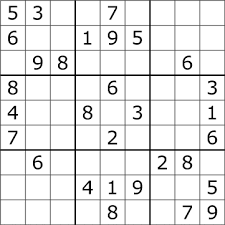 <img src='https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Sudoku_Puzzle_by_L2G-20050714_solution_standardized_layout.svg/250px-Sudoku_Puzzle_by_L2G-20050714_solution_standardized_layout.svg.png' width=250>






The sudoku puzzle may be in any forms of an *N x N* grid and there will be N subregions (the 3x3 sections in 9x9 grid) with the size of $\sqrt{N}$x$\sqrt{N}$, where N is the squared of 2, 3, 4, and so on. However, normally, it will be in the form of 9x9. The numbers available to be filled are 1 to *N*. For example, if *N = 4*, it will be a 4x4 grid with 4 subregions having the size of 2x2 each and the numbers needed to be present in each row, column, and subregions are 1 to 4. <br>
<br>
There may also be other types of sudoku puzzle but in this case study, only the original type (*N x N* with *N* subregions, each with a size of $\sqrt{N}$x$\sqrt{N}$) will be taken into account. Here are some examples of the other types.

<img src="http://mathpuzzle.com/Sudoku/WeiHwaSudoku/22-wacky-geometric.gif" width=500>


### 3.2 Brute Force Algorithm

---



From 81 squares available in Sudoku games, each square can be any number from 1 to 9, so there are 6,670,903,752,021,072,936,960 possible solutions of sudoku. Using the normal brute force technique that builds a tree and does the depth first search can take very long time. Therefore, instead of trying all possible solutions, the impossible actions that make sudoku invalid will be eliminated while exploring the tree in depth-first search algorithm. This technique is also known as bracktracking. 
<br>
<br>The idea of backtracking search is a normal depth-first search that will completely explore one branch to a possible solution before moving to another branch. This is one of the most general and basic techniques for searching for possible solutions of a problem as every possible moves are generated and is then tested to see whether it solves the problem. Although it has been established that approximately 6.67 x $10^{21}$ final grids exist, a brute force algorithm can be a practical method to solve Sudoku puzzles.
<br>
<br>A brute force algorithm visits the empty cells in some order, filling in digits sequentially, or backtracking when the number is found to be not valid. Briefly, a program would solve a puzzle by placing the digit "1" in the first cell and checking if it is allowed to be there. If there are no violations (checking row, column, and box (or subregion) constraints) then the algorithm advances to the next cell, and places a "1" in that cell. When checking for violations, if it discovers that the "1" is not allowed, the value is advanced to "2". If a cell discovers where none of the 9 digits is allowed, then the algorithm leaves that cell blank and moves back to the previous cell. The value in that cell is then incremented by one. This is repeated until the allowed value in the last (81st) cell is discovered. [1]
<br>
<br>The animation below shows how a Sudoku is solved with this method. The puzzle's clues (initial numbers) shown in red remain fixed while the algorithm tests each unsolved cell with a possible solution. Notice that the algorithm may discard all the previously tested values if it finds the existing set does not fulfil the constraints of the Sudoku. [1]

<img src='https://upload.wikimedia.org/wikipedia/commons/8/8c/Sudoku_solved_by_bactracking.gif' width=250>

To have more idea how backtracking algorithm work, here are the code and explanation of the backtracking algorithm.
<br>
<br>First, we designed the sudoku puzzle into 2D array list called container. The blank space in the sudoku puzzle will be replaced as number 0 in the list. The goal of solving puzzle is to find a valid sudoku without number 0 remaining in the list (all blank space filled). 

In [0]:
container9 = [
            [5, 3, 0, 0, 7, 0, 0, 0, 0],
            [6, 0, 0, 1, 9, 5, 0, 0, 0],
            [0, 9, 8, 0, 0, 0, 0, 6, 0],
            [8, 0, 0, 0, 6, 0, 0, 0, 3],
            [4, 0, 0, 8, 0, 3, 0, 0, 1],
            [7, 0, 0, 0, 2, 0, 0, 0, 6],
            [0, 6, 0, 0, 0, 0, 2, 8, 0],
            [0, 0, 0, 4, 1, 9, 0, 0, 5],
            [0, 0, 0, 0, 8, 0, 0, 7, 9]
]

Then create a function to check the validity of the sudoku. The valid sudoku means that each row, column, and small 3x3 box have no repeated numbers in it.

In [0]:
def is_filled(puzzle):
    # Check if the puzzle is entirely filled.
    for row in puzzle:
        if 0 in row: return False
    return True

def check_square(num, row, col, puzzle):
    # Check if num is valid at puzzle[row][col] based on the 3x3 box it resides in
    yPos = row % 3
    xPos = col % 3

    if yPos == 0:
        yRange = range(row, row+3)
    elif yPos == 1:
        yRange = range(row-1, row+2)
    elif yPos == 2:
        yRange = range(row-2, row+1)

    if xPos == 0:
        xRange = range(col, col+3)
    elif xPos == 1:
        xRange = range(col-1, col+2)
    elif xPos == 2:
        xRange = range(col-2, col+1)

    for i in yRange:
        for j in xRange:
            if puzzle[i][j] == num:
                return False
    return True

def check_row_col(num, row, col, puzzle):
    # Check if column and row  are valid
    for j in range(9):
        if puzzle[row][j] == num or puzzle[j][col] == num:
            return False
    return True

def is_position_valid(num, row, col, puzzle):
    return (check_square(num, row, col, puzzle)
            and check_row_col(num, row, col, puzzle))

After that, define a function to find the number 0 (blank space) in the list to let the algorithm try to fill the numbers later.

In [0]:
def first_unused(puzzle):
    # Returns the [row, col] of the topmost-leftmost 0 in puzzle
    for i, row in enumerate(puzzle):
        if 0 in row:
            zeroAt = row.index(0)
            return [i, zeroAt]

Next, define a function to replace number zero with some possible number that still makes the puzzle valid.

In [0]:
def add_number(puzzle):
    # Returns a list of puzzles with the firstUnused(puzzle) replaced with 1 <= i <= 9, if i is valid in that position
    unused = first_unused(puzzle)
    row = unused[0]
    col = unused[1]
    res = []
    for i in range(1, 10):
        if not is_position_valid(i, row, col, puzzle): continue
        r = [puzzle[j][:] for j in range(len(puzzle))]
        r[row][col] = i
        res.append(r)
    return res

Finally, define functions for solving sudoku.

In [0]:
def solve_list(puzzles):
    # Produces the solution for one of the puzzles or False
    if puzzles == []:
        return False
    else:
        cur = solve(puzzles[0])
        if not cur:
            if puzzles == []:
                return False
            else: return solve_list(puzzles[1:])
        return cur

def solve(puzzle):
    # Produces the solved puzzle or return False in case of no valid solution available
    if is_filled(puzzle):
        return puzzle
    else: return solve_list(add_number(puzzle))

To have a beatiful output,  the print function is also defined.

In [0]:
def print_sudoku(container):
  boxLength = int(math.sqrt(len(container)))
  print("","-"*((boxLength*2+2)*boxLength+1))
  for r in range(len(container)):   
    storage = ""
    for c in range(len(container)):
      if (c)%boxLength == 0:
        storage+=" |"
      storage+=" "+str(container[r][c])
    storage+=" |"
    print(storage)
    if (r+1)%boxLength == 0:
      print("","-"*((boxLength*2+2)*boxLength+1))

In [0]:
print("Question Puzzle: ")
print_sudoku(container9)
print("Answer: ")
start_time = time.time()
print_sudoku(solve(container9))
end_time = time.time()
print("Time used:",end_time - start_time,"seconds")

Question Puzzle: 
 -------------------------
 | 5 3 0 | 0 7 0 | 0 0 0 |
 | 6 0 0 | 1 9 5 | 0 0 0 |
 | 0 9 8 | 0 0 0 | 0 6 0 |
 -------------------------
 | 8 0 0 | 0 6 0 | 0 0 3 |
 | 4 0 0 | 8 0 3 | 0 0 1 |
 | 7 0 0 | 0 2 0 | 0 0 6 |
 -------------------------
 | 0 6 0 | 0 0 0 | 2 8 0 |
 | 0 0 0 | 4 1 9 | 0 0 5 |
 | 0 0 0 | 0 8 0 | 0 7 9 |
 -------------------------
Answer: 
 -------------------------
 | 5 3 4 | 6 7 8 | 9 1 2 |
 | 6 7 2 | 1 9 5 | 3 4 8 |
 | 1 9 8 | 3 4 2 | 5 6 7 |
 -------------------------
 | 8 5 9 | 7 6 1 | 4 2 3 |
 | 4 2 6 | 8 5 3 | 7 9 1 |
 | 7 1 3 | 9 2 4 | 8 5 6 |
 -------------------------
 | 9 6 1 | 5 3 7 | 2 8 4 |
 | 2 8 7 | 4 1 9 | 6 3 5 |
 | 3 4 5 | 2 8 6 | 1 7 9 |
 -------------------------
Time used: 0.13515973091125488 seconds


It can be noticed that the way an algorithm works is always the same for every sudoku puzzles. The algorithm will try to put some possible number into the blank box and backtrack if it reaches the invalid state. One programmer reported that such an algorithm may typically require as few as 15,000 cycles, or as many as 900,000 cycles to solve a Sudoku, each cycle being the change in position of a "pointer" as it moves through the cells of a Sudoku. Therefore, there are some sudoku puzzles that were especially created to work against the bracktracking program.
<br>
<br>A Sudoku can be constructed to work against backtracking. Assuming the solver works from top to bottom (as in the animation), a puzzle with few clues (17 initial numbers), no clues in the top row, and has a solution "987654321" for the first row, would work in opposition to the algorithm. Thus the program would spend significant time "counting" upward before it arrives at the grid which satisfies the puzzle. In one case, a programmer found a brute force program required six hours to arrive at the solution for such a Sudoku (albeit using a 2008-era computer). [1]
<br>
<br><img src='https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Sudoku_puzzle_hard_for_brute_force.svg/520px-Sudoku_puzzle_hard_for_brute_force.svg.png' width=250>

In [0]:
special_problem = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 3, 0, 8, 5],
    [0, 0, 1, 0, 2, 0, 0, 0, 0],
    [0, 0, 0, 5, 0, 7, 0, 0, 0],
    [0, 0, 4, 0, 0, 0, 1, 0, 0],
    [0, 9, 0, 0, 0, 0, 0, 0, 0],
    [5, 0, 0, 0, 0, 0, 0, 7, 3],
    [0, 0, 2, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 4, 0, 0, 0, 9]
]

print("Question Puzzle: ")
print_sudoku(special_problem)
print("Answer: ")
start_time = time.time()
print_sudoku(solve(special_problem))
end_time = time.time()
print("Time used:",end_time - start_time,"seconds")

Question Puzzle: 
 -------------------------
 | 0 0 0 | 0 0 0 | 0 0 0 |
 | 0 0 0 | 0 0 3 | 0 8 5 |
 | 0 0 1 | 0 2 0 | 0 0 0 |
 -------------------------
 | 0 0 0 | 5 0 7 | 0 0 0 |
 | 0 0 4 | 0 0 0 | 1 0 0 |
 | 0 9 0 | 0 0 0 | 0 0 0 |
 -------------------------
 | 5 0 0 | 0 0 0 | 0 7 3 |
 | 0 0 2 | 0 1 0 | 0 0 0 |
 | 0 0 0 | 0 4 0 | 0 0 9 |
 -------------------------
Answer: 
 -------------------------
 | 9 8 7 | 6 5 4 | 3 2 1 |
 | 2 4 6 | 1 7 3 | 9 8 5 |
 | 3 5 1 | 9 2 8 | 7 4 6 |
 -------------------------
 | 1 2 8 | 5 3 7 | 6 9 4 |
 | 6 3 4 | 8 9 2 | 1 5 7 |
 | 7 9 5 | 4 6 1 | 8 3 2 |
 -------------------------
 | 5 1 9 | 2 8 6 | 4 7 3 |
 | 4 7 2 | 3 1 9 | 5 6 8 |
 | 8 6 3 | 7 4 5 | 2 1 9 |
 -------------------------
Time used: 2037.4108731746674 seconds


You can see that this puzzle significantly used more time to solve than the normal puzzle (estimately 20374 times slower).

### 3.3. Reinforcement Algorithm (Temporal Difference Control: Sarsa)

---



To make an algorithm that the solving time does not depend on the puzzle itself, applying reinforcement learning techniques was thought to be the right solution. 
<br>
<br>The idea was that an agent that can learn about how to reach final state of the sudoku puzzle in the fastest way, based on the given puzzle will be created. The agent will have general knowledge of the puzzle, that is, if the sudoku table still has at least a blank space, it will know which number should be filled in which blank space.
<br>
<br>To make this,  <b>TD-Control (Sarsa)</b> technique learned in the class was applied. 

#### 3.3.1. State

---


TD-Control or Sarsa required the programmer to define 3 parameters; state, action, and reward. So, at the beginning, the problem of how the state of the sudoku puzzle should be defined was considered. The answer was that the entire table should be defined as a state. 
<br>
<br>The agent needs to take an action (fill numbers) based on how the entire table looks like. This makes each number and its position hold some meanings and relations that can be used by the agent as a knowledge to guide itself to reach the terminal state. Therefore, all of that information in the state should be preserved. The state was then designed to be the entire sudoku table. In summary, the state for reinforcement learning is the 2D array that describes how the sudoku table look like.
<br>
<br>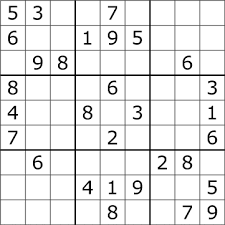 
<br>
<br>For an example, the state for sudoku above is the 2D list of<br>
[<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[5, 3, 0, 0, 7, 0, 0, 0, 0],<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[6, 0, 0, 1, 9, 5, 0, 0, 0],<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[0, 9, 8, 0, 0, 0, 0, 6, 0],<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[8, 0, 0, 0, 6, 0, 0, 0, 3],<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[4, 0, 0, 8, 0, 3, 0, 0, 1],<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[7, 0, 0, 0, 2, 0, 0, 0, 6],<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[0, 6, 0, 0, 0, 0, 2, 8, 0],<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[0, 0, 0, 4, 1, 9, 0, 0, 5],<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[0, 0, 0, 0, 8, 0, 0, 7, 9]<br>
]<br> (As stated earlier, the blank space will be represented by 0.)
<br>
<br>For this case study, the start state is the given puzzle with some blank space, and the terminating state is the state that all spaces are filled with valid numbers (i.e. the puzzle is solved), or the state with some invalid numbers placed in the list (i.e. if algorithm tries to put some number to the blank space that makes the sudoku invalid, it will immediately terminate itself and start from starting point again).
<br>
<br>When an agent places some number on any blank position, the state will change.

Here is the starting state we used in the case study. Please noted that, since the reinforcement learning can also take time and resources to train the agent to work properly, the size of sudoku is reduced from 9x9 to 4x4 so that the agent can faster.

In [0]:
# Starting State
question = [
    [0,2,3,0],
    [3,4,1,2],
    [2,3,4,1],
    [0,1,2,0]
]
print_sudoku(question)

 -------------
 | 0 2 | 3 0 |
 | 3 4 | 1 2 |
 -------------
 | 2 3 | 4 1 |
 | 0 1 | 2 0 |
 -------------


The function to check validity is needed to know whether the sudoku should terminate and start over or continue to the next step. Here is the code for that function.

In [0]:
def is_valid_row(container):
  # Return True if every row in sudoku is valid
  for row in container:
    row = [x for x in row if x!= 0]
    if len(row) != len(set(row)): 
      return False
  return True

def is_valid_column(container):
  # Return True if every column in sudoku is valid
  containerLength = len(container)
  for c in range(containerLength):
    numbersInColumn = [number[c] for number in container if number[c] != 0]
    if len(numbersInColumn) != len(set(numbersInColumn)):
      return False
  return True

def is_valid_box(container):
  # Return True if every small box in sudoku is valid
  containerLength = len(container)
  boxLength = int(math.sqrt(containerLength))
  for r in range(0, containerLength, boxLength):
    for c in range(0, containerLength, boxLength):
      box = [b[c:c+boxLength] for b in container[r:r+boxLength]]
      numbers = []
      for row in box:
        numbers.extend([x for x in row if x != 0])
      if len(numbers) != len(set(numbers)):
        return False
  return True

def is_valid(container):
  # Return True if 3 conditions above is valid
  if len(container) != len(container[0]):
    print("Error: Sudoku container size is not valid")
    return False
  rowStatus = is_valid_row(container)
  columnStatus = is_valid_column(container)
  boxStatus = is_valid_box(container)
  return (rowStatus and columnStatus and boxStatus)

The functions ***is_valid_row(container)***, ***is_valid_column(container)***, and ***is_valid_box(container)*** are used to check if the numbers in each row, column, and box are valid (i.e. no duplicated numbers) respectively. These are called by the function ***is_valid(container)***, which will return whether the puzzle is valid.

#### 3.3.2. Action

---


Actions for the agent in this case study is to select the blank space and fill a number from 1 to 9 in it.

In [0]:
# Starting State
question = [
    [0,2,3,0],
    [3,4,1,2],
    [2,3,4,1],
    [0,1,2,0]
]
print_sudoku(question)

 -------------
 | 0 2 | 3 0 |
 | 3 4 | 1 2 |
 -------------
 | 2 3 | 4 1 |
 | 0 1 | 2 0 |
 -------------


For example, the puzzle above have 4 blank spaces in the corner, each space can be place with number 1, 2, 3, or 4. Therefore, there are 4(blank spaces) * 4(possible numbers for each blank space) = 16 possible actions for this puzzle state.
<br>
<br>In this case study, the action was defined as a 3D tuple with these data:

1.   Row of the selected blank space (r)
2.   Column of the selected blank space (c)
3.   Number that will place on the blank space (number)

and is represented as (r, c, number).<br>
<br>
Here is the function for finding an action for each state.

In [0]:
def find_action(state, blanks, epsilon):
  numbers = [i+1 for i in range(len(state))]
  
  actions = []
  for b in blanks:
    for n in numbers:
      actions.append((b[0], b[1], n))
  
  if not str(state) in Q:
    Q.update({str(state):{}})
    
  possible_values = []
  for a in actions:
    if not a in Q[str(state)]:
      Q[str(state)].update({a : 0})
    possible_values.append(Q[str(state)][a])

  if len(possible_values) == 0:
    return 'terminate'
  index_of_max = possible_values.index(max(possible_values))

  probs = []
  for i in range(len(actions)):
    if i == index_of_max:
      probs.append(1 - epsilon + (epsilon/len(actions)))
    else:
      probs.append(epsilon/len(actions))

  actions = [str(a) for a in actions]
  selected_action = random.choice(actions, p=probs)
  
  selected_action = selected_action[1:len(selected_action)-1]
  selected_action = selected_action.split(', ')
  selected_action = tuple(int(n) for n in selected_action)
  
  return selected_action

The inputs are:


*   **state** is the current state (i.e. the current filled sudoku table)
*   **blanks** is a tuple (r, c), showing row and column of all blank space positoins
*  **epsilon** is the epsilon value used for finding the current policy derived from Q

<br>
Please noted that Q matrix was defined as an empty dictionary at first and the values for each Q(state, action) will be initiated to be 0 whenever the new state is encountered. The structure of Q will be explained in the later section (3.3.4 Algorithm).<br>
<br>

For the variables in the function:

*   **Q** is a global dictionary (will be explained later in section 3.3.4 Algorithm) representing the state-action values.
*   **actions** is a list of 3D tuples of all possible actions for this state, consisting of (r, c, number), where r, c is the blank space position and number is the number to be filled.
*   **possible_values** is a list of all state-action values of all possible actions. The length of **possible_values** is 0 if the state has no blank space left (i.e. reaches the terminating state).
*   **index_of_max** is an index of an action in **possible_values** that has the maximum state-action value, which will be used to calculate the policy.
*   **probs** is a list of all probabilities of all possible actions for this state.

Noted that each action tuple is converted into string since the **numpy.random.choice()** only receives 1D list as an input. It will then be converted back as a tuple after finishing randoming the action.<br>
<br>
The function then returns the selected action as an output.






#### 3.3.3. Reward

---


Since an agent uses rewards to improve the policy over time, here is how the reward for this case study was designed.
- Each time agent takes an action, the reward equal to -1 is given back to the agent. 
- If the agent takes an action that makes the sudoku invalid, an additional -10 reward is added for that step.
- If the agent takes an action that leads to the terminating state (i.e. can solve the puzzle), an additional reward of +20 is added.

#### 3.3.4. Algorithm

---


Here is the main code for the Sarsa reinforcement learning technique for solving sudoku puzzle.

In [0]:
Q = {}

def sarsa(state_original):
  alpha = 0.5
  gamma = 1
  
  for i in range(10000):
    state = copy.deepcopy(state_original)
    state_length = len(state)
    blanks = [(r,c) for r in range(state_length) for c in range(state_length) if state[r][c] == 0]
    epsilon = 1/(i+1)
    
    action = find_action(state, blanks, epsilon)
    
    
    while '0' in str(state):
      reward = -1
      
      next_state = copy.deepcopy(state)
      next_state[action[0]][action[1]] = action[2]
      
      blanks.remove((action[0], action[1]))
      next_action = find_action(next_state, blanks, epsilon)
        
      if not action in Q[str(state)]:
        Q[str(state)].update({action : 0})
      if not next_action in Q[str(next_state)]:
        Q[str(next_state)].update({next_action : 0})
        
      if not is_valid(next_state):
        reward -= 10
        Q[str(state)][action] = Q[str(state)][action] + alpha*(reward + gamma*Q[str(next_state)][next_action] - Q[str(state)][action])
        break
        
      if '0' not in str(next_state):
        reward += 20
        Q[str(next_state)][next_action] = 0
      Q[str(state)][action] = Q[str(state)][action] + alpha*(reward + gamma*Q[str(next_state)][next_action] - Q[str(state)][action])
      state = copy.deepcopy(next_state)
      action = next_action
      
  return Q

The agent learns on the given puzzle for 10000 times to adjust the state-action values. The policy will then be derived from Q, the state-action values matrix.<br>
<br>
The structure chosen for Q is a dictionary since it will be easier to organize the code. The structure is in the form of:<br>
{
<br>&nbsp;&nbsp;state1:
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;{
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; action1: value, 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; action2: value,
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ...
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;},
<br>&nbsp;&nbsp;state2:
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;{
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; action1: value, 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; action2: value,
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ...
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;}, 
<br>&nbsp;&nbsp;...
<br>}
<br>
where **state1, state2,...** is each state of sudoku, and **action1, action2,...** are the possible actions for that state. An example of getting the state-action value of state ***s*** and action ***a*** is **Q[str(s)][a]**.<br>
<br>
Noted that the state is converted into string before being used as a pointer because the dictionary cannot use 2D or more data as a pointer.<br>

In [0]:
question = [
    [0,2,3,0],
    [3,4,1,2],
    [2,3,4,1],
    [0,1,2,0]
]
policy = sarsa(question)

It can be seen that the policy is obtained for solving this sudoku, now the things left is to apply that policy to solve the puzzle. To do that, the print function is created to print base action from the given state in the policy. Here is the code for doing so.

In [0]:
def max_policy(state, q):
  action_value = q[str(state)]
  return max(action_value.items(), key=operator.itemgetter(1))[0]

def max_policy_describe(state, q):
  action_value = q[str(state)]
  solution = max(action_value.items(), key=operator.itemgetter(1))[0]
  return "Put number " + str(solution[2]) + " in position (" + str(solution[0]) + "," + str(solution[1]) + ")"

def solve_sudoku_from_policy(container, policy):
  output = copy.deepcopy(container)
  print("From puzzle")
  print_sudoku(output)
  next_action = max_policy(output, policy)
  print(max_policy_describe(output, policy))
  output[next_action[0]][next_action[1]] = next_action[2]
  print_sudoku(output)
  
  while "0" in str(output):
    next_action = max_policy(output, policy)
    print(max_policy_describe(output, policy))
    output[next_action[0]][next_action[1]] = next_action[2]
    print_sudoku(output)

Then the function was used to find the solution.

In [0]:
start_time = time.time()
solve_sudoku_from_policy(question, policy)
end_time = time.time()
print("Time used:",end_time - start_time,"seconds")

From puzzle
 -------------
 | 0 2 | 3 0 |
 | 3 4 | 1 2 |
 -------------
 | 2 3 | 4 1 |
 | 0 1 | 2 0 |
 -------------
Put number 3 in position (3,3)
 -------------
 | 0 2 | 3 0 |
 | 3 4 | 1 2 |
 -------------
 | 2 3 | 4 1 |
 | 0 1 | 2 3 |
 -------------
Put number 4 in position (3,0)
 -------------
 | 0 2 | 3 0 |
 | 3 4 | 1 2 |
 -------------
 | 2 3 | 4 1 |
 | 4 1 | 2 3 |
 -------------
Put number 1 in position (0,0)
 -------------
 | 1 2 | 3 0 |
 | 3 4 | 1 2 |
 -------------
 | 2 3 | 4 1 |
 | 4 1 | 2 3 |
 -------------
Put number 4 in position (0,3)
 -------------
 | 1 2 | 3 4 |
 | 3 4 | 1 2 |
 -------------
 | 2 3 | 4 1 |
 | 4 1 | 2 3 |
 -------------
Time used: 0.015764713287353516 seconds


It can be noticed that with the policy from agent's knowledge, the puzzle can be solved in a very short time.
<br>
<br>From the above code, what is done is that the question puzzle state is found in the policy that the agent learned for a period of time. The policy for each state will tell the probability for each action in that state.<br>
<br>
Noted that the policy is obtained through deriving the values in the state-action values matrix, Q, using epsilon-greedy algorithm. Here is the state-action values of the first state obtained from the algorithm.



In [0]:
Q[str(question)]

{(0, 0, 1): -3.091155990958214,
 (0, 0, 2): -8.25,
 (0, 0, 3): -5.5,
 (0, 0, 4): -9.625,
 (0, 3, 1): -5.5,
 (0, 3, 2): -5.5,
 (0, 3, 3): -8.25,
 (0, 3, 4): -3.748046875,
 (3, 0, 1): -8.25,
 (3, 0, 2): -5.5,
 (3, 0, 3): -9.625,
 (3, 0, 4): -1.9479369819164276,
 (3, 3, 1): -5.5,
 (3, 3, 2): -9.625,
 (3, 3, 3): 16.0,
 (3, 3, 4): -8.25}

All the possible actions and the state-action values for this state can be seen from the output. The first two numbers in the tuple indicate the position of the blank space position. The third number is the number to be filled in that position. It can be represented as (r, c, number).<br>
<br>
Here, the maximum value is 16.0 from an action (3, 3, 3), which is considered the best action. The action (3, 3, 3) means to fill the number 3 into the blank space on the position (3, 3).
<br>
<br>After taking an action, the state will change to the next one. In this case, it is shown below.

In [0]:
question[3][3] = 3
print_sudoku(question)

 -------------
 | 0 2 | 3 0 |
 | 3 4 | 1 2 |
 -------------
 | 2 3 | 4 1 |
 | 0 1 | 2 3 |
 -------------


Then the policy for this state was derived again and the new action was taken. This continued until the solution state was reached. That is how the algorithm works to find the solution.

In [0]:
Q[str(question)]

{(0, 0, 1): 5.4453125,
 (0, 0, 2): -5.5,
 (0, 0, 3): -5.5,
 (0, 0, 4): -5.5,
 (0, 3, 1): -5.5,
 (0, 3, 2): -5.5,
 (0, 3, 3): -8.25,
 (0, 3, 4): -0.96875,
 (3, 0, 1): -5.5,
 (3, 0, 2): -5.5,
 (3, 0, 3): -5.5,
 (3, 0, 4): 17.0}

In this case, the next action is to fill number 4 in the position (3, 0) since it has the highest value.

#### 3.3.5. Take a step further

---


The next question is how to adapt this technique to work with any sudoku puzzle, not only the given puzzle used by the agent to learn for solving problem. Is it necessary to have an agent learned every sudoku in the world to make a policy that works with those puzzles? The answer is no. The agent can just learn to construct all possible sudoku from the all-zero puzzle.

In [0]:
allzero = [
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0],
    [0,0,0,0]
]
policy_from_zero = sarsa(allzero)

This way, the agent will have much more wider knowledge about the possible output for many puzzles. The policy obtained can then be used to solve the puzzle, like in the previous question.
<br>
<br>For example, after the agent has learned by using an all-zero puzzle as a start state, its knowledge can be used to solve the new puzzle that the agent has never seen before.

In [0]:
new_question = [
    [1,2,3,4],
    [3,0,0,2],
    [2,0,0,1],
    [4,1,2,3]
]

start_time = time.time()
solve_sudoku_from_policy(new_question, policy_from_zero)
end_time = time.time()
print("Time used:",end_time - start_time,"seconds")

From puzzle
 -------------
 | 1 2 | 3 4 |
 | 3 0 | 0 2 |
 -------------
 | 2 0 | 0 1 |
 | 4 1 | 2 3 |
 -------------
Put number 4 in position (1,1)
 -------------
 | 1 2 | 3 4 |
 | 3 4 | 0 2 |
 -------------
 | 2 0 | 0 1 |
 | 4 1 | 2 3 |
 -------------
Put number 4 in position (2,2)
 -------------
 | 1 2 | 3 4 |
 | 3 4 | 0 2 |
 -------------
 | 2 0 | 4 1 |
 | 4 1 | 2 3 |
 -------------
Put number 3 in position (2,1)
 -------------
 | 1 2 | 3 4 |
 | 3 4 | 0 2 |
 -------------
 | 2 3 | 4 1 |
 | 4 1 | 2 3 |
 -------------
Put number 1 in position (1,2)
 -------------
 | 1 2 | 3 4 |
 | 3 4 | 1 2 |
 -------------
 | 2 3 | 4 1 |
 | 4 1 | 2 3 |
 -------------
Time used: 0.014703989028930664 seconds


This way, the reinforcement learning algorithm will work with any soduku puzzles exsiting with an amount of time used less than the brute force algorithm. 
<br>
<br>The drawback of this method is only that it takes very long time to train an agent since it will try with a lot of possibilities and the memory will be needed to keep the state-action values for computing the policy. Furthermore, the higher *N* in *N x N* sudoku puzzle, the higher amount of time used for learning.

## 4. 15-Puzzle Game

---



### 4.1. General Information about 15-Puzzle Game

---


The 15-Puzzle is a good form of entertainment that has been popular for over 100 years. The puzzle is simple enough that it can be solved by children, but ones can have a difficult time solving it at first if they are not good at solving puzzles. The puzzle itself contains 16 box in form of 4x4 table. These boxes are filled with number 1 - 15 and leave one box empty. Numbers can be in any order possible. The aims of the game is simply to reorder the number 1-15 in the correct possition by moving/sliding the numbered boxes in up/down/left/right direction to switch place with the blank position until numbers are in an increasing order and the empty box is in the bottom right corner.<br>
<br>
The picture below shows an example of the 15-Puzzle problem. The left image is the problem given to the player and the right one is the desired state of the puzzle.

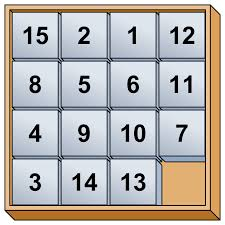 <img src="https://rosettacode.org/mw/images/thumb/7/79/15_puzzle.png/300px-15_puzzle.png" width=250>

Normally, the puzzle is usually in 4x4 matrix. However, it can be in the form of any *N x N* matrix, with the numbers from 1 to ($N^2- 1$) and one blank position. For an example, in 3x3 matrix, the number will be 1 to 8 with one blank position.<br>
<br>
In this case study, the 4x4 type will be used as a base type.

### 4.2. Brute Force Algorithm

---


For this kind of puzzle, there is no explicit rule or way to solve it by following the instructor. What player mostly do is to try to arrange number one by one into the correct position. For example, player will try to place number 1 first in the top left corner. Then try to place number 2 next to the number 1. This will go on and on until the player finishes placing number 15. Along the way, some corrected position number will also have to move in order to make the other numbers possible to move. Therefore, there is an algorithm that can explicitly solve the 15-puzzle game, which is to do the brute force with the search tree. 
<br>
<br>Since, for 15 puzzle, there are (15+1)!/2 = 10,461,394,944,000 possible states and finding the shortest possible solution to any given N-Puzzle has been proven to be NP-complete, the brute-force technique must be informed in order to solve puzzle.
<br>
<br>Algorithm for doing brute force 15-puzzle will not be shown here since the algorithm is very long. We recommend to check [N-puzzle solver from jgardner8's GitHub](https://github.com/jgardner8/NPuzzle) for more information about how to use brute force with 15-puzzle problem. [2]

### 4.3. Reinforcement Algorithm (Temporal Difference Control: Sarsa)

---


Like sudoku game, using reinforcement learning techques with 15-puzzle was believed to be more suitable and use less amount of time to solve the puzzle. Therefore, the idea is to use TD control (Sarsa) technique with the 15-puzzle game.
<br>
<br>To do that, the state, actions, and rewards for this puzzle are defined.

#### 4.3.1. State

---


Same as the sudoku puzzle, the entire number position in 15-puzzle table have their meanings and relations. Therefore, to define a state for this puzzle game, the whole table was used (same as in Sudoku).
This time, the numpy array was used as a structure instead of the list. The state was defined as a 2D numpy array where each index contains number 0 to 15 and represents the position of that number (again, 0 represents the blank position).
<br>
<br><img src="https://cdncontribute.geeksforgeeks.org/wp-content/uploads/15-puzzle.png" width=200> 

For an example, the above initial 15-puzzle can be represent in the state as shown below.

In [0]:
board = [
    [ 2,  1,  3,  4],
    [ 5,  6,  7,  8],
    [ 9, 10, 11, 12],
    [13, 14, 15,  0]
]
board = np.array(board)
print(board)

[[ 2  1  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15  0]]


For the start state, it can be any 4x4 table fill with number 1-15 and leave one position blank. However, to guarantee that the puzzle can be solve, some rules are needed.
<br>
<br>For a given grid of $N x N$:
- If N is odd, then puzzle instance is solvable if number of inversions is even in the input state.
- If N is even, puzzle instance is solvable if:
    - the blank is on an even row counting from the bottom (second-last, fourth-last, etc.) and the number of inversions is odd.
    - the blank is on an odd row counting from the bottom (last, third-last, fifth-last, etc.) and the number of inversions is even.
- For all other cases, the puzzle instance is not solvable. [3]
 
<br>
where the number of inversions will be describe as follows.
<br>
Assuming the tiles written out in a single row (1D Array) instead of being spread in $N$rows and $N$ column (2D Array), the number of inversions is the number of pairs of tiles $(a, b)$ that $a$ appears before $b$ and $a > b$ where $a$ and $b$ are the number from 1 to 15 (meaning that the blank position is excluded).<br>
<br>
For an above example, consider the tiles written out in a single row:
<br><b>2 1 3 4 5 6 7 8 9 10 11 12 13 14 15 0</b>
<br>The above grid forms only 1 inversion i.e. (2, 1). [3]
<br>
<br>Here is another example to see how to check whether the puzzle is solvable.
<br><img src="https://www.geeksforgeeks.org/wp-content/uploads/15Puzz3.png" width=250><img src="https://www.geeksforgeeks.org/wp-content/uploads/15Puzz4.png" width=250>
<br>
<br>Therefore, to check if the puzzle is solvable or not, the function was created. Here is the code.

In [0]:
def find_inversion_count(board):
  # Return the number of incersion
  flattened_board = board.flatten()
  inversion_count = 0
  
  for i in range(len(flattened_board)):
    if flattened_board[i] == 0:
      continue
    for j in range(i+1,len(flattened_board)):
      if flattened_board[j] == 0:
        continue
      if flattened_board[i] > flattened_board[j]:
        inversion_count += 1

  return inversion_count  

In [0]:
def find_blank_index(board):
  # Return the blank box index from the state
  return np.where(board == 0)

In [0]:
def is_solvable(board):
  # Return True if puzzle is solvable
  rows_count = len(board)
  columns_count = len(board[0])

  for row in board:
    if len(row) != columns_count:
      print("Invalid board. Each row needs to have the same length.")
      return False

  if rows_count != columns_count:
    print("Invalid board. The dimension has to be N*N.")
    return False

  all_numbers = [i+1 for i in range(rows_count*columns_count-1)]
  for row in board:
    for item in row:
      if item == 0:
        continue
      if item in all_numbers:
        all_numbers.remove(item)
      else:
        print('Invalid board. Duplicated number detected.')
        return False

  blank_index = find_blank_index(board)
  if blank_index[0].size <= 0:
    print('Invalid board. No blank found.')
    return False
  elif blank_index[0].size > 1:
    print('Invalid board. More than one blank detected.')

  inversion_count = find_inversion_count(board)
  blank_row_position = blank_index[0]
  if rows_count % 2 == 0:
    if blank_row_position % 2 == 0 and inversion_count % 2 != 0:
      return True
    elif blank_row_position % 2 != 0 and inversion_count % 2 == 0:
      return True
  else:
    if inversion_count % 2 == 0:
      return True

  print('The board is unsolvable')
  return False   

The function ***find_inversion_count(board)*** is called by the ***is_solvable(board)*** function to find the number of inversions. The **flatten()** from numpy helps to flatten the board from 2D to 1D, which makes it easier to find the inversions. This is one reason for using the numpy array instead of a normal list.<br>
<br>
The general concept of finding inversions is that two loops are used. The outer loop marks the position of one number. The inner will then repeatedly find all numbers that come after this marked number. If the number in the inner loop is lower than the one from the outer loop, the inversions count increases. Noted that the number 0 is excluded since it represents the blank position.<br>
<br>
The function ***find_blank_index(board)*** is used to find the index of the blank position. This function is just a simple single-row function which calls numpy array but the purpose is for the better readable code. It is called by the ***is_solvable(board)*** to find the position and check whether it is on the odd or even row. It will also be called later when using the algorithm to solve the puzzle.<br>
<br>
The function ***is_solvable(board)*** is the main function which returns whether the board is solvable. It also checks cases of a wrong input. The type of wrong input can be noticed by the print function in each condition.<br>
<br>
Then the function to create the terminal state for any N-puzzle game was created.

In [0]:
def init_terminating(N):
  terminate = []
  for r in range(N):
    terminate.append([])
    for c in range(N):
      terminate[r].append(N*r+c+1)

  terminate[r][c] = 0
  return np.array(terminate)

TERMINATING = init_terminating(4)

In [0]:
print(TERMINATING)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15  0]]


For 15-puzzle, there is only one terminal state, the state where numbers are ordered from 1 to 15 and leave the buttom right corner blank. It can be represented as a numpy array shown above.

The helper function to find the next state from the current state and actionwas also created. Here is the code.

In [0]:
def find_next_state(input_state, action):
  state = copy.deepcopy(input_state)
  blank_position = find_blank_index(state)
  row = blank_position[0]
  column = blank_position[1]
  
  if action == ACTIONS[0]:
    state[row, column], state[row-1, column] = state[row-1, column], state[row, column]
  elif action == ACTIONS[1]:
    state[row, column], state[row+1, column] = state[row+1, column], state[row, column]
  elif action == ACTIONS[2]:
    state[row, column], state[row, column-1] = state[row, column-1], state[row, column]
  elif action == ACTIONS[3]:
    state[row, column], state[row, column+1] = state[row, column+1], state[row, column]
    
  return state

The function just checks the action taken and swap the position of the blank position with the state above/below/to the left of/to the right of the blank based on the action.

#### 4.3.2. Action

---


For actions in 15-puzzle, there are maximum of 4 actions possible; move the blank box up, down, left, or right. Therefore, the arrows were used to represent these actions as shown below.

In [0]:
ACTIONS = ['↑','↓','←','→']

A function was created to find the next action. Here is the code.

In [0]:
def find_action(state, epsilon):
  # Return action to take
  global Q
  blank_position = find_blank_index(state)
  board_size = len(state)

  row = blank_position[0]
  column = blank_position[1]
  possible_actions = copy.deepcopy(ACTIONS)
  if row == 0:
    possible_actions.remove(ACTIONS[0])
  elif row == board_size - 1:
    possible_actions.remove(ACTIONS[1])
  if column == 0:
    possible_actions.remove(ACTIONS[2])
  elif column == board_size - 1:
    possible_actions.remove(ACTIONS[3])

  if str(state) not in Q:
    Q.update({str(state):{}})
    
  possible_action_values = []
  for a in possible_actions:
    if a not in Q[str(state)]:
      Q[str(state)].update({a : 0})
    possible_action_values.append(Q[str(state)][a])
  
  best_action_index = possible_action_values.index(max(possible_action_values))
  probs = []
  for i in range(len(possible_actions)):
    if i == best_action_index:
      probs.append(1 - epsilon + (epsilon/len(possible_actions)))
    else:
      probs.append(epsilon/len(possible_actions))
      
  selected_action = random.choice(possible_actions, p=probs)
  
  return selected_action

The ***find_action(state, epsilon)*** function receives two input - state and epsilon. The general concept is that all actions are added in to the list **possible_actions**. Each element in **possible_actions** is just a string of one arrow. Then it checks whether the blank position is next to the border and removes the impossible actions. For an example, if the blank position is on the bottom row (last row), the action of going down is removed. The **possible_actions** list now contains only possible actions as its name says.<br>
<br>
Noted that Q matrix or the state-action values matrix works the same way as was done in Sudoku. It was defined as an empty dictionary at first and the values for each Q(state, action) will be initiated to be 0 whenever the new state is encountered. The structure of Q will be explained in the later section (4.3.4 Algorithm).<br>
<br>
The epsilon-greedy algorithm is then used to find the policy or the probabilities of actions for choosing the action.<br>
<br>
The function finally returns the selected action as an output.

#### 4.3.3. Reward

---


Since an agent uses rewards to improve the policy over time, here is how the reward for this 15-puzzle game algorithm was designed.
- Each time the agent takes an action, the reward equal to -1 is given back to the agent. 
- If the agent can take an action that leads to the terminate state (i.e. the puzzle is solved), an additional reward +30 is added.

#### 4.3.4. Algorithm

---


Here is the main code for the Sarsa reinforcement learning technique for solving 15-puzzle.
<br>
<br>Noted that the agent was limited to be able to take actions for only 100 times. If it reaches that number and agent still cannot find the terminating state, it will immediately end that loop and start over from the beginning again.

In [0]:
Q = {}

def sarsa(board):
  alpha = 0.5
  gamma = 0.3
  for i in range(10000):
    state = copy.deepcopy(board)
    epsilon = 1/(i+1)

    action = find_action(state, epsilon)
    j = 0
    reward = 0
    while j < 100 and not np.array_equal(state, TERMINATING):
      j+=1
      reward -= 1
      next_state = find_next_state(state, action)
      next_action = find_action(next_state, epsilon)

      if np.array_equal(next_state, TERMINATING):
        reward += 30
      if action not in Q[str(state)]:
        Q[str(state)].update({action : 0})
      Q[str(state)][action] += alpha*(reward + gamma*Q[str(next_state)][next_action] - Q[str(state)][action])
      state = copy.deepcopy(next_state)
      action = next_action
  return

The agent learned from the given puzzle for 10000 times to adjust the state-action values, which were stored in Q. The policy will then be derived from Q.<br>
<br>
The structure chosen for Q is a dictionary since it will be easier to organize the code (same as in Sudoku). The structure is in the form of:<br>
{
<br>&nbsp;&nbsp;state1:
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;{
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; action1: value, 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; action2: value,
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ...
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;},
<br>&nbsp;&nbsp;state2:
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;{
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; action1: value, 
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; action2: value,
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ...
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;}, 
<br>&nbsp;&nbsp;...
<br>}
<br>
where **state1, state2,...** are states of the 15_puzzle and **action1, action2,...** are possible actions for that state, which are each a string of single arrow ('↑','↓','←','→'). An example of getting the state-action value of state ***s*** and action ***a*** is **Q[str(s)][a]**<br>
<br>
Noted that the state is converted in to string for the same purpose as in Sudoku (dictionary cannot use many dimensional object as a pointer).

In [0]:
board = [
    [ 1,  2,  3,  4],
    [ 5,  6,  7,  8],
    [ 9, 10, 11,  0],
    [13, 14, 15, 12]
        ]
board = np.array(board)
if is_solvable(board):
  sarsa(board)

Now that the matrix Q is obtained, the policy can be derived. Here is an example of the state-action values of the initial board.

In [0]:
print(Q[str(board)])
print("Maximum Probability: ",max(Q[str(board)]))

{'↑': -1.025, '↓': 29.0, '←': -0.3879605376720429}
Maximum Probability:  ↓


As can be seen, the maximum value is from an action of moving the blank downward. Therefore, the next action chosen is to move the box at that direction. The process is repeated until the terminating state is reached.
<br>
<br>To make it simpler to understand, the print function was created to print out the entire solution for the puzzle.

In [0]:
def max_policy(state, q):
  action_value = q[str(state)]
  return max(action_value.items(), key=operator.itemgetter(1))[0]

def max_policy_describe(state, q):
  action_value = q[str(state)]
  solution = max(action_value.items(), key=operator.itemgetter(1))[0]
  return "Move the blank box in " + str(solution) + " direction."

def solve_15puzzle_from_policy(container, policy):
  output = copy.deepcopy(container)
  print("From puzzle")
  print(output)
  next_action = max_policy(output, policy)
  print(max_policy_describe(output, policy))
  output = find_next_state(output,next_action)
  print(output)
  
  while not np.array_equal(output,TERMINATING):
    next_action = max_policy(output, policy)
    print(max_policy_describe(output, policy))
    output = find_next_state(output,next_action)
    print(output)

In [0]:
solve_15puzzle_from_policy(board,Q)

From puzzle
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11  0]
 [13 14 15 12]]
Move the blank box in ↓ direction.
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15  0]]


The function will print all actions that should be taken until it reaches the terminating state. In this case, it needs only one action in order to reach the terminating state.

## 5. Conclusion

---


Throughout this case study, it can be said that the reinforcement learning is absolutely a great technique to implement in solving the task that normally takes time to process with brute force algorithm. The difference between these two algorithms is that brute force, as its name says, uses only its brute strength to find the solution (just try all possible cases) while reinforcement learning uses the concept of knowledge and experiences in order to solve the problem, which is very helpful in the domain of puzzle games, where having general knowledge about the game will help the player solve that puzzle faster.
<br>
<br>First, an experiment of implementing the reinforcement learning into sudoku puzzle was done. The outcome was the agent that can solve any 4x4 sudoku puzzle in less than a minute. Unlike brute force algorithm that some Sudoku problems can be constructed to prevent, the reinforcement learning algorithm can solve problems very fast with independence of how the initial problem look like. That is because of the agent has already tried that sudoku again and agian to find the optimal solution to solve the problem. Therefore, if the output has already been found, it can generate the output within a few seconds.
<br>
<br>Also, in the 15-puzzle game, the agent was built to learn the puzzle and the policy was made from the state-action calues to solve the problem. After letting the agent learn for some period of time, it can solve any puzzle of this game within minutes, which is very fast compared to the brute firce algorithm.
<br>
<br>However, one major problem were encountered during this case study. To build the accurate and high performance agents, a lot of time and resources are needed. For example, to train an agent to work with 9x9 sudoku from an all-zero table, it will take more than a couple of days to gain general knowledge used to solve some basic sudoku puzzles (only 3 or 4 blank space), and is still not possible to solve all Sudoku problems. That is why in this case study, only 4x4 sudoku was usedas the experiment puzzle. The same goes for the 15-puzzle game, the agent was trained for a couple of hours and can only solve one or two basic problems that take less than 3 steps to solve the puzzle.
<br>
<br>Some other problems encountered were about start and terminating states for Sudoku. Each start state of Sudoku has their own terminating state (solved state). Since there are many possible start states. there are also many terminating states. This was quite a problem since reinforcement learning algorithm that was built only depended on one terminating state. The agent will need to train entirely again if the start state changes since most of Sudoku problems have different sets of possible states. For the trick used in this case study, the agent was set to learn from an all-zero table so that it will have more knowledge about the states without having to train from each possible state in the puzzle agian. Using this way to train agent for a long time will guarantee that the agent will know most of the puzzles and be able to solve them properly.<br>
<br>
As for the 15-puzzle game, the problem of various possible states does not matter since they all have the same terminating state. However, the actual problem, that was also encountered, could be the very low chance of reaching the only one terminating state. The ratio of the terminating state over all possible states is very little. In this case study, the number of steps needed to do until reaching terminating state from the 15-puzzle problem is only one step. However, if this number increases, for an example, to 10 steps, the agent will not be able to find the terminating state since within these 10 steps, there are many possible states that can be reached and at earlier trial, the agent just randomly moves the tiles with no knowledge. As a result, the agent will reach the action steps limit and start over again. The chance to reach the terminating state is dramatically low.<br>
<br>
This might lead to the question "Why don't we give more time to the agent by removing the action steps limit?". Actually, at first, there was no limit. The result was that the agent could not even finish one episode (i.e. could not reach the terminating state). It was because at first, the agent had no knowledge and moved randomly. With that randomness, it caused the agent to diverge from the terminating state. Therefore, the limit were set with an idea of if the agent moves over 100 times, that path is considered a bad path, so it should stop going to the bad path and start finding the correct path from the beginning again.<br>
<br>
The optimal method has not been found yet. The program may have to be more complicated but that could be experimented after we have gained more knowledge about reinforcement learning.<br>
<br>
In conclusion, we think that the reinforcement learning is absolutely helpful in domain of gaming and puzzle since these problem usually required knowledge of player to solve the game. I would like to use the word from István Szita's Reinforcement Learning in Games to conclude that "...without any modifications, the basic reinforcement learning algorithms are rarely sufficient for high-level gameplay, so it is essential to discuss the additional ideas, ways of inserting domain knowledge, implementation decisions that are necessary for scaling up". [4]

## 6. References

---


[1] Sudoku Solving Algorithm. (Retrieved from https://en.wikipedia.org/wiki/Sudoku_solving_algorithms on May 5, 2019)
<br>[2] N-puzzle Brute Force Solver (Retrieved from https://github.com/jgardner8/NPuzzle on May 6, 2019)
<br>[3] How to check if an instance of 15 puzzle is solvable? (Retrieved from https://www.geeksforgeeks.org/check-instance-15-puzzle-solvable/ on May 6, 2019)
<br>[4] István Szita: Reinforcement Learning in Games (2012)